### Тема: Решение телеграфных уравнений с помощью преобразования Лапласа

**Выполнил**: Лежнин Максим Витальевич (ПМ-31)

**Преподаватель**: Гурьянов М.А., кафедра ВМ-1

###### Проектная работа

###### Осенний семестр, 2023 год

###### МИЭТ, Зеленоград

## Теоретические выкладки

### Вывод задачи и преобразование Лапласа

Телеграфные уравнения задаются следующей системой:
$$
\begin{cases}
    \frac{\partial}{\partial x} U(x,\, t) = -L \frac{\partial}{\partial t} I(x,\, t) - RI(x,\, t) \\
    \frac{\partial}{\partial x} I(x,\, t) = -C \frac{\partial}{\partial t} U(x,\, t) - GU(x,\, t)
\end{cases}
$$

Эти уравнения можно совместить для получения двух отдельных волновых уравнений:
$$
\begin{cases}
    \frac{\partial^2}{\partial x^2} U(x,\, t) = LC \frac{\partial^2}{\partial t^2} U(x,\, t) + (RC + GL) \frac{\partial}{\partial t} U(x,\, t) + GRU(x,\, t) \\
    \frac{\partial^2}{\partial x^2} I(x,\, t) = LC \frac{\partial^2}{\partial t^2} I(x,\, t) + (RC + GL) \frac{\partial}{\partial t} I(x,\, t) + GRI(x,\, t) 
\end{cases}
$$

Так как они идентичны, то буду решать только одно из них. Введем для сокращения следующие переменные:
$$a^2 = LC,\ b = \frac{1}{2} (RC + GL),\ c^2 = GR$$

Наше дифференциальное уравнение:
$$U_{xx} = a^2 U_{tt} + 2b U_t + c^2 U$$
С начальными и граничным условиями ($x,\, t \in [0,\, +\infty)$):
$$
\begin{cases}
    U(x,\, 0) = f_0(x) \\
    U_t(x,\, 0) = f_1(x) \\
    U(0, t) = E(t)
\end{cases}
$$

Воспользуемся преобразованием Лапласа. Получим обыкновенное дифференциальное уравнение относительно переменной $x.$ А конкретнее - линейное неоднородное 2-ого порядка:
$$U_{xx}(x,\, p) = U(x,\, p) (a^2p^2 + 2bp + c^2) - ((a^2p + 2b)f_0(x) + a^2f_1(x))$$

Получим следующие граничные условия:
$$
\begin{cases}
    U(0, p) = \mathcal{L}(E(t))(p) = F(p) \\
    U(+\infty,\, p) = 0 \text{ (следует из физических соображений)}
\end{cases}
$$

### Решение для ненулевых начальных условий (с использованием метода гомотопических возмущений)

Решать буду численно с использованием HPM (Homotopy Perturbation Method/Метод Гомотопических Возмущений) на основе статьи "Numerical solution of telegraph equation by using LT inversion technique" под авторством Mohammad Javidi и Nemat Nyamoradi.

#### Описание метода гомотопических возмущений (HPM)
Сначала мы представляем уравнение в следующей форме:
$$L(U) = 0,$$
где $L$ - интегральный/дифференциальный оператор.

Для решения уравнения мы можем выбрать выпуклую гомотопию, которая определяется следующим образом:
$$H(U,\, p) = (1 - p)F(U) + pL(U) = 0,$$
где $F$ - еще один оператор, для которого легко решить уравнение $F(U) = 0$.

Заметим, что:
$$H(U,\, 0) = F(U) = 0\ \ \ H(U,\, 1) = L(U) = 0$$

Таким образом эта выпуклая гомотопия непрерывно отображает неявно заданную кривую с начальной точкой $H(U,\, 0) = 0$ в функцию решения $H(U,\, 1) = 0$. Параметр $p$ монотонно возрастает от 0 к 1 и тривиальная задача $F(U) = 0$ непрерывно деформируется в изначальную $L(U) = 0$. Метод гомотопических возмущений использует параметр $p$ для  получения решения вида:
$$U' = u_0 + pu_1 + p^2u_2 + ...$$

Соотвественно, когда $p \to 1$ - это решение становится решением нашего уравнения:
$$U = \lim\limits_{p \to 1} U' = u_0 + u_1 + u_2 + ...$$

Чтобы получить функции $u_0,\, u_1,\, ...$ - мы можем подставить решение (без $p \to 1$) в гомотопию и приравнять коэффициенты при одинаковых степенях $p$. 

#### Использование метода для решения преобразованного по Лапласу уравнения
Построим следующую гомотопию:
$$U(x,\, p) (a^2p^2 + 2bp + c^2) = (a^2p + 2b)f_0(x) + a^2f_1(x) + sU_{xx}(x,\, p)$$

Решение такого уравнения представим в виде:
$$U'(x,\, p) = \sum\limits_{n = 0}^\infty s^n u_n(x,\, p),$$
где $u_n$ - функции, которые нам надо найти.

Подставим это решение в гомотопию:
$$\sum\limits_{n = 0}^\infty s^n u_n(x,\, p) (a^2p^2 + 2bp + c^2) = (a^2p + 2b)f_0(x) + a^2f_1(x) + s\frac{\partial^2}{\partial x^2}\sum\limits_{n = 0}^\infty s^n u_n(x,\, p)$$

Приравняем коэффициенты при соответствующих степенях $s$:
$$
\begin{align*}
    &s^0:\ u_0 (a^2p^2 + 2bp + c^2) = (a^2p + 2b)f_0(x) + a^2f_1(x)\\
    &s^1:\ u_1 (a^2p^2 + 2bp + c^2) = \frac{\partial^2}{\partial x^2} u_0\\
    &...\\
    &s^{n + 1}:\ u_{n + 1} (a^2p^2 + 2bp + c^2) = \frac{\partial^2}{\partial x^2} u_n
\end{align*}
$$

Откуда получаем итеративный процесс:
$$u_0 = \frac{(a^2p + 2b)f_0(x) + a^2f_1(x)}{(a^2p^2 + 2bp + c^2)},\ u_{n + 1} = \frac{1}{(a^2p^2 + 2bp + c^2)} \frac{\partial^2}{\partial x^2} u_n$$

Из которого получим решение нашего уравнения:
$$U(x,\, p) = \lim\limits_{s \to 1} U' = \sum\limits_{n = 0}^\infty u_n$$

Далее, решение телеграфного уравнения получается с помощью численного обратного преобразования Лапласа.

### Решение с нулевыми начальными условиями привычными методами

Если же даны нулевые НУ, то мы получаем однородное линейное уравнение 2-ого порядка:
$$U_{xx}(x,\, p) = U(x,\, p) (a^2p^2 + 2bp + c^2)$$

Пусть $U = e^{rx}$, где $r$ - неизвестная константа. Подставим:
$$r^2 e^{rx} = e^{rx}(a^2p^2 + 2bp + c^2) \implies  r = \pm \sqrt{a^2p^2 + 2bp + c^2}$$

То есть наше решение будет иметь следующий вид:
$$U(x,\, p) = Ae^{x\sqrt{a^2p^2 + 2bp + c^2}} + Be^{-x\sqrt{a^2p^2 + 2bp + c^2}},$$
где $A$ и $B$ - какие-то константы, которые мы сейчас найдем.

Из второго ГУ следует, что при $x \to +\infty$ решение $U \to 0$. При таком условии на $x$ экспонента с минусом "зануляется" и остается лишь первое слагаемое, где экспонента наоборот возрастает. Отсюда можно сделать вывод, что $A = 0$. Тогда сразу же можно заметить, что из первого ГУ следует $B = F(p)$. Таким образом решение однородного случая следующее:
$$U(x,\, p) = F(p) e^{-x\sqrt{a^2p^2 + 2bp + c^2}}$$

Далее используется численное обратное преобразование Лапласа.

### Аналитическое решение для нулевых начальных условий и линии без искажений

Будь нам дана линяя без искажений ($RC = GL$), то мы могли бы получить полноценное аналитическое решение. Распишем решение преобразованного уравнения из предыдущего пункта подробнее:
$$U(x,\, p) = F(p) e^{-x\sqrt{LCp^2 + (RC + GL)p + GR}}$$
$$U(x,\, p) = F(p) e^{-x\sqrt{LC}\sqrt{p^2 + 2\frac{R}{L}p + \left(\frac{R}{L}\right)^2}}$$
$$U(x,\, p) = F(p) e^{-x\sqrt{LC}\left(p + \frac{R}{L}\right)}$$

Теперь можем применить обратное преобразование Лапласа (без применения численных методов). Получаем следующее аналитическое решение:
$$
U(x,\, t) = 
\begin{align*}
&\begin{cases}
    E(t - \sqrt{LC}x) e^{\frac{R}{L}x}, &t > \sqrt{LC} x \\
    0, &t < \sqrt{LC} x \\
\end{cases}
\end{align*}
$$

## Реализация на python
### Подключаю необходимые библиотеки

In [1]:
import math
import numpy as np
import mpmath
import scipy
import matplotlib.pyplot as plt

### Функции для решения уравнения

In [2]:
# combination n choose k
def combination(k, n):
    return math.factorial(n) / math.factorial(k) / math.factorial(n - k)

# numerical n-th derivative by forward difference
def nth_derivative(func, x_0, n, h = 0.001):
    ans = 0
    for k in range(n + 1):
        ans += (-1)**(n + k) * combination(k, n) * func(x_0 + k * h) / h**n
    return ans

# only works for nonzero initial conditions
def LHPM_solution(R, C, G, L, E, f_0, f_1, n=3):
    a = np.sqrt(L * C)
    b = (R * C + G * L) / 2
    c = np.sqrt(G * R)
    u = []
    u.append(lambda p: lambda x: ((a**2 * p + 2 * b) * f_0(x) + a**2 * f_1(x)) / (a**2 * p**2 + 2 * b * p + c**2))
    for i in range(n):
        u.append(lambda p: lambda x:  nth_derivative(u[0](p), x, 2 * (i + 1)) / (a**2 * p**2 + 2 * b * p + c**2) ** (2 + i))
    return lambda x, t: mpmath.invertlaplace(lambda p: sum([func(p)(x) for func in u]), t)

# only works for zero initial condition
def numerical_solution(R, C, G, L, E):
    a = np.sqrt(L * C)
    b = (R * C + G * L) / 2
    c = np.sqrt(G * R)
    F = lambda p: mpmath.quad(lambda t: E(t) * mpmath.exp(- t * p), [0, np.inf])
    return lambda x, t: mpmath.invertlaplace(lambda p: F(p) * mpmath.exp(-x * mpmath.sqrt(a**2 * p ** 2 + 2 * b * p + c ** 2)), t)

# only works for zero initial condition
# and distortionless lines (RC = GL)
def theoretical_solution(R, C, G, L, E):
    a = np.sqrt(L * C)
    b = (R * C + G * L) / 2
    return lambda x, t: E(t - a*x) * np.exp(- b / a * x) if t >= a * x else 0 

def visualise(X, T, is_zero_initial, is_distortionless, U_numerical_values = [], U_theoretical_values = [], U_LHPM_values = [], error = []):
    XX, YY = np.meshgrid(X, T)
    
    if is_zero_initial:
        # for standart numerical method
        fig = plt.figure(figsize=(10, 8))
        ax = plt.axes(projection='3d')
        ax.set_xlabel('x', fontsize=12)
        ax.set_ylabel('t', fontsize=12)
        ax.set_zlabel('U(x, t)', fontsize=12)
        ax.view_init(20, 30)
        ax.set_title("Numerical solution")
        ax.plot_surface(XX, YY, np.array(U_numerical_values), cmap='Reds', shade=True);
        
        if is_distortionless:
            # for theoretical method
            fig = plt.figure(figsize=(10, 8))
            ax = plt.axes(projection='3d')
            ax.set_xlabel('x', fontsize=12)
            ax.set_ylabel('t', fontsize=12)
            ax.set_zlabel('U(x, t)', fontsize=12)
            ax.view_init(20, 30)
            ax.set_title("Theoretical solution")
            ax.plot_surface(XX, YY, np.array(U_theoretical_values), cmap='Blues', shade=True);
    
        print(f"Max error: {max(errors)}")
        print(f"Mean error: {np.mean(errors)}")
    
    else:
        # for LHPM method
        fig = plt.figure(figsize=(10, 8))
        ax = plt.axes(projection='3d')
        ax.set_xlabel('x', fontsize=12)
        ax.set_ylabel('t', fontsize=12)
        ax.set_zlabel('U(x, t)', fontsize=12)
        ax.view_init(20, 30)
        ax.set_title("LHPM solution")
        ax.plot_surface(XX, YY, np.array(U_LHPM_values), cmap='Reds', shade=True);

### Итоговая функция для численного решения телеграфных уравнений при любых НУ

In [3]:
def general_numeric_method(R, C, G, L, E, is_zero_initial = 0, f_0 = lambda x: 0, f_1 = lambda x: 0, n = 3):
    if is_zero_initial:
        return numerical_solution(R, C, G, L, E)
    else: 
        return LHPM_solution(R, C, G, L, E, f_0, f_1, n)

### Пример 1 (нулевые НУ, линия без искажений)

#### Входные данные

In [4]:
# input data for resistance, inductivity, etc
R = 5
C = 0.05
G = 0.05
L = 5

# flag:
# if 0 - using LHPM method (and f_0, f_1 as initial conditions)
# if 1 - using standart methods (and zero initial conditions)
is_zero_initial = 1

# initial conditions
f_0 = lambda x: np.sinh(x)
f_1 = lambda x: -2 * np.sinh(x)

# boundary condition for U(0, t)
# must be a function
E = lambda t: math.sin(3 * t)

# discretized X, T domains
X = np.linspace(1, 2, 10)
T = np.linspace(1.5, 2.5, 10)

In [5]:
# check if distortionless transmission line
if R * C == G * L:
    is_distortionless = 1
else:
    is_distortionless = 0

#### Инициализация и определение функций решений

In [6]:
U_numerical = general_numeric_method(R, C, G, L, E, is_zero_initial)
U_theoretical = theoretical_solution(R, C, G, L, E)

#### Получение значений на сетке

In [7]:
# set up setting for mpmath
mpmath.dps = 15
mpmath.pretty = True

# initializing lists of values
U_numerical_values = []
U_theoretical_values = []
U_LHPM_values = []
errors = []

# getting values
counter = 0
for x in X:
    counter += 1
    if is_zero_initial:
        U_numerical_values.append([])
        if is_distortionless:
            U_theoretical_values.append([])
    else:
        U_LHPM_values.append([])   
        
    for t in T:
        if is_zero_initial:
            U_numerical_values[-1].append(U_numerical(x, t))
            if is_distortionless:
                U_theoretical_values[-1].append(U_theoretical(x, t))
                errors.append(abs(U_numerical_values[-1][-1] - U_theoretical_values[-1][-1]))
        else:
            U_LHPM_values[-1].append(U_LHPM(x, t))
    print("Done", counter, "out of", len(X))

Done 1 out of 10
Done 2 out of 10
Done 3 out of 10
Done 4 out of 10
Done 5 out of 10
Done 6 out of 10
Done 7 out of 10
Done 8 out of 10
Done 9 out of 10
Done 10 out of 10


#### Визуализация

Max error: 0.00628632488891992
Mean error: 0.000502879268988195


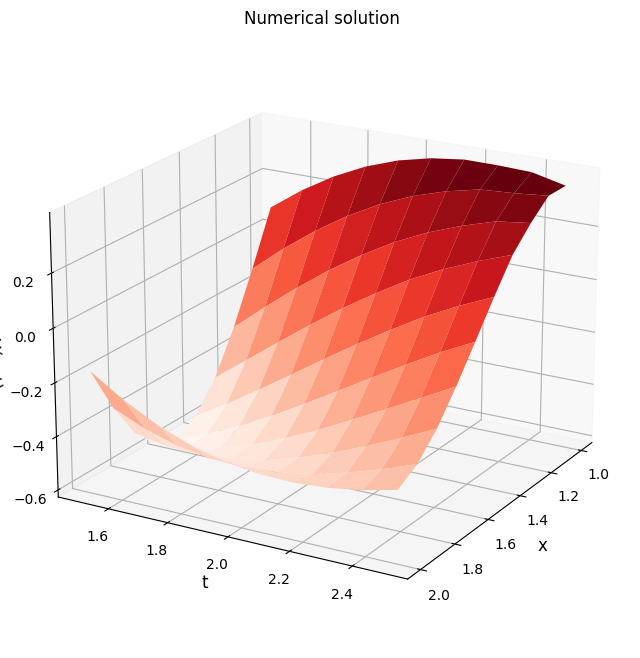

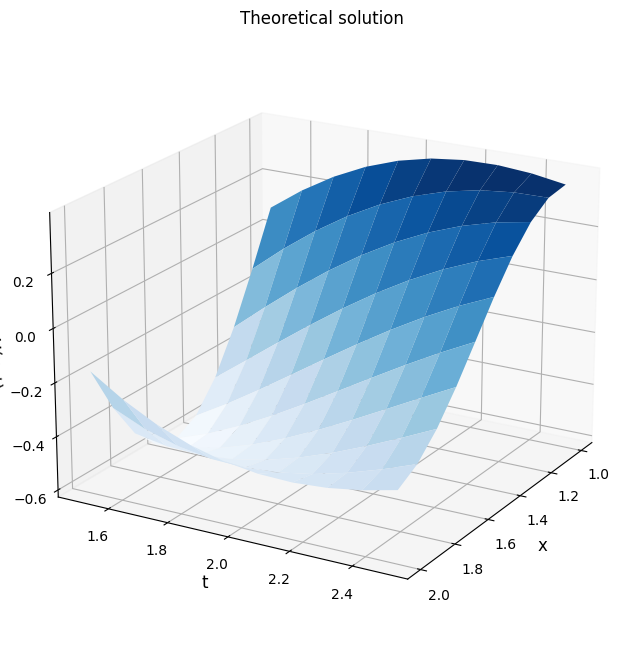

In [8]:
visualise(X, T, is_zero_initial, is_distortionless, U_numerical_values, U_theoretical_values, errors)

### Пример 2 (ненулевые НУ)

#### Входные данные

In [9]:
# input data for resistance, inductivity, etc
R = 20
C = 0.05
G = 0.05
L = 20

# flag:
# if 0 - using LHPM method (and f_0, f_1 as initial conditions)
# if 1 - using standart methods (and zero initial conditions)
is_zero_initial = 0

# initial conditions
f_0 = lambda x: np.sinh(x)
f_1 = lambda x: -2 * np.sinh(x)

# discretized X, T domains
X = np.linspace(1, 2, 10)
T = np.linspace(1.5, 2.5, 10)

In [10]:
# check if distortionless transmission line
if R * C == G * L:
    is_distortionless = 1
else:
    is_distortionless = 0

#### Инициализация и определение функций решений

In [11]:
U_numerical = general_numeric_method(R, C, G, L, E, is_zero_initial, f_0, f_1)

#### Получение значений на сетке

In [12]:
# set up setting for mpmath
mpmath.dps = 15
mpmath.pretty = True

# initializing lists of values
U_numerical_values = []
U_theoretical_values = []
U_LHPM_values = []

# getting values
counter = 0
for x in X:
    counter += 1
    if is_zero_initial:
        U_numerical_values.append([])
        if is_distortionless:
            U_theoretical_values.append([])
    else:
        U_LHPM_values.append([])   
        
    for t in T:
        if is_zero_initial:
            U_numerical_values[-1].append(U_numerical(x, t))
            if is_distortionless:
                U_theoretical_values[-1].append(U_theoretical(x, t))
                errors.append(abs(U_numerical_values[-1][-1] - U_theoretical_values[-1][-1]))
        else:
            U_LHPM_values[-1].append(U_numerical(x, t))
    print("Done", counter, "out of", len(X))

Done 1 out of 10
Done 2 out of 10
Done 3 out of 10
Done 4 out of 10
Done 5 out of 10
Done 6 out of 10
Done 7 out of 10
Done 8 out of 10
Done 9 out of 10
Done 10 out of 10


#### Визуализация

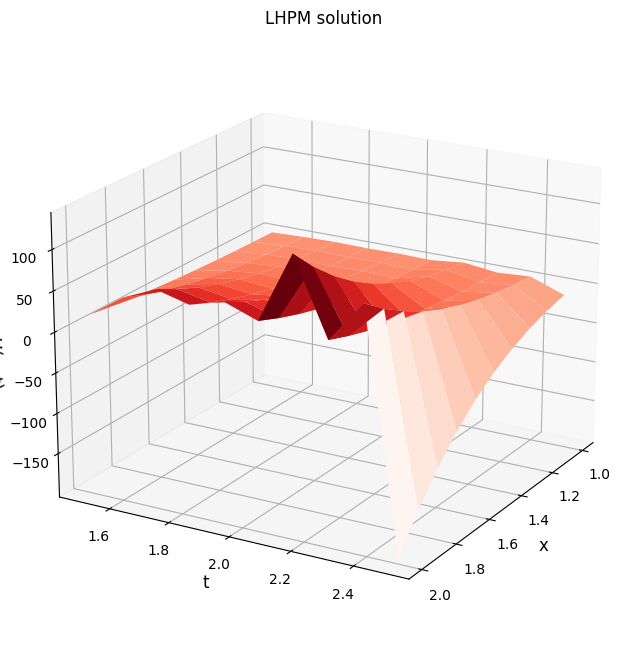

In [13]:
visualise(X, T, is_zero_initial, is_distortionless, U_numerical_values, U_theoretical_values, U_LHPM_values, errors)